# Motion with Quadratic Drag

This notebook contains two numerical simulations involving quadratic drag:
1. One dimensional vertical motion in reduced variables
2. Two dimensional projectile motion of a golf ball with air resistance


## Import Required Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Part 1: One Dimensional Motion with Quadratic Drag (Reduced Variables)

The velocity is expressed in units of the terminal velocity and time is expressed in units of the characteristic time constant τ.


### Parameters and Initial Conditions


In [2]:
v0 = -10      # initial velocity (v / v_ter)
t_max = 5     # maximum reduced time (t / tau)
dt = 0.001

t = np.arange(0, t_max, dt)
v = np.zeros_like(t)
v[0] = v0


### Time Integration Loop


In [4]:
for i in range(1, len(t)):
    v[i] = v[i-1] + dt * (-1 + v[i-1]**2)

### Velocity vs Time Plot


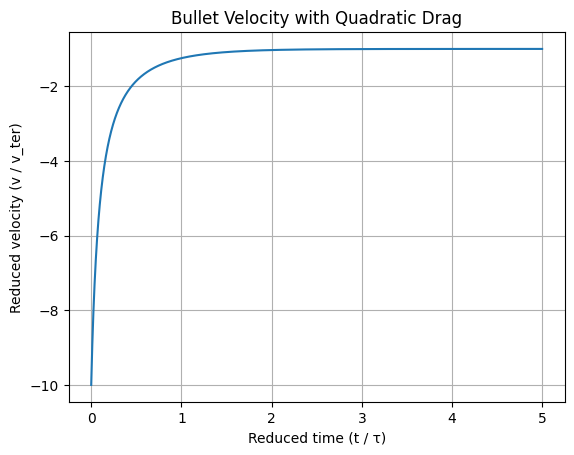

In [5]:
plt.plot(t, v)
plt.xlabel("Reduced time (t / τ)")
plt.ylabel("Reduced velocity (v / v_ter)")
plt.title("Bullet Velocity with Quadratic Drag")
plt.grid()
plt.show()


## Part 2: Two Dimensional Projectile Motion with Quadratic Drag

This section models the trajectory of a golf ball under gravity and quadratic air resistance.


### Physical Parameters and Initial Conditions


In [6]:
g = 9.81          # m/s^2
v0 = 90           # m/s
theta = np.radians(30)

vx = v0 * np.cos(theta)
vy = v0 * np.sin(theta)

c = 3.63e-4       # drag coefficient
m = 0.05          # mass of golf ball (kg)


### Position and Velocity Storage


In [7]:
x = [0]
y = [0]

vx_list = [vx]
vy_list = [vy]

dt = 0.001


### Time Integration Loop


In [8]:
while y[-1] >= 0:
    v = np.sqrt(vx**2 + vy**2)

    ax = -(c/m) * v * vx
    ay = -(c/m) * v * vy - g

    vx += ax * dt
    vy += ay * dt

    x.append(x[-1] + vx * dt)
    y.append(y[-1] + vy * dt)

    vx_list.append(vx)
    vy_list.append(vy)


### Final Range Output


In [9]:
print("Range of golf ball with drag:")
print(x[-1])


Range of golf ball with drag:
193.77348401728594


### Trajectory Plot


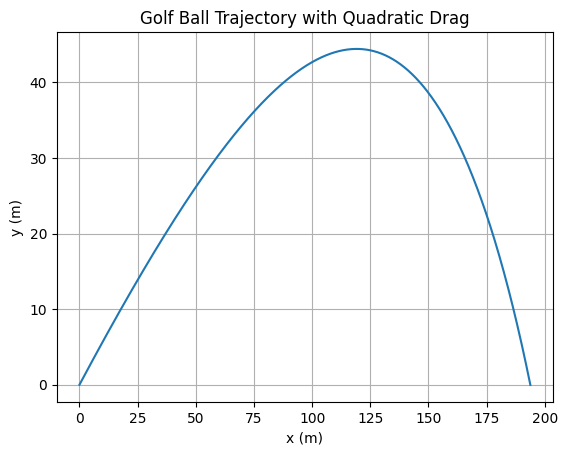

In [10]:
plt.plot(x, y)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Golf Ball Trajectory with Quadratic Drag")
plt.grid()
plt.show()
